In [0]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#Read headlines data
data = pd.read_csv("news_headlines.csv")
data.head()

,Unnamed: 0,publish_date,headline_text
0,355023,20080106,kibaki offers unified kenyan govt
1,508861,20091223,gp deregistered over depression prescriptions
2,374650,20080404,opposition wants more protection for indigenous
3,958559,20150608,queens birthday honours recognise country
4,549951,20100712,smith wont commit to second term ets


In [0]:
data['year'] = data['publish_date'].apply(str).str[:4]

In [0]:
data.head()

,Unnamed: 0,publish_date,headline_text,year
0,355023,20080106,kibaki offers unified kenyan govt,2008
1,508861,20091223,gp deregistered over depression prescriptions,2009
2,374650,20080404,opposition wants more protection for indigenous,2008
3,958559,20150608,queens birthday honours recognise country,2015
4,549951,20100712,smith wont commit to second term ets,2010


In [0]:
#Transform the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.headline_text.values)
print(X[1])

  (0, 6880)	1
  (0, 4599)	1
  (0, 4585)	1
  (0, 12096)	1


In [0]:
#Topic modeling with SVD
from sklearn.decomposition import TruncatedSVD
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = pd.DataFrame(lsa.fit_transform(X.asfptype()), columns = ['C1', 'C2'])

In [0]:
dtm_lsa.head()

,C1,C2
0,0.025211,0.075375
1,0.000748,0.002635
2,0.021819,0.035558
3,0.009154,0.026424
4,0.011632,0.007627


In [0]:
df_lsa = data
df_lsa['Bow']=X
df_lsa['C1'] = dtm_lsa['C1']
df_lsa['C2'] = dtm_lsa['C2']
df_lsa['Topic'] = np.where(dtm_lsa['C1']>dtm_lsa['C2'], 'T1', 'T2')
df_lsa.head()

,Unnamed: 0,publish_date,headline_text,year,Bow,C1,C2,Topic
0,355023,20080106,kibaki offers unified kenyan govt,2008,"(0, 6876)\t1\n (0, 8631)\t1\n (0, 8664)\t1...",0.025211,0.075375,T2
1,508861,20091223,gp deregistered over depression prescriptions,2009,"(0, 6876)\t1\n (0, 8631)\t1\n (0, 8664)\t1...",0.000748,0.002635,T2
2,374650,20080404,opposition wants more protection for indigenous,2008,"(0, 6876)\t1\n (0, 8631)\t1\n (0, 8664)\t1...",0.021819,0.035558,T2
3,958559,20150608,queens birthday honours recognise country,2015,"(0, 6876)\t1\n (0, 8631)\t1\n (0, 8664)\t1...",0.009154,0.026424,T2
4,549951,20100712,smith wont commit to second term ets,2010,"(0, 6876)\t1\n (0, 8631)\t1\n (0, 8664)\t1...",0.011632,0.007627,T1


Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

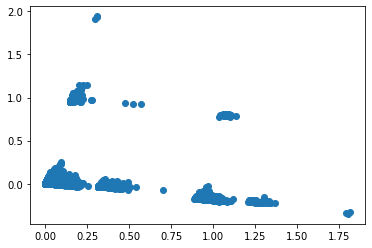

In [0]:
#Visualize the points on the orthogonal plot
%pylab inline
import matplotlib.pyplot as plt
figure()

plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'])

In [0]:
colors = {'T1':'r', 'T2':'b'}

In [0]:
#Add a column to give colors base don the column you select
#Let us say, we would like to color the points based on the topic
df_lsa['Topic'].head()

0    T2
1    T2
2    T2
3    T2
4    T1
Name: Topic, dtype: object

In [0]:
#Map the colors with column values
df_lsa['Topic'].apply(lambda x:colors[x]).head()

0    b
1    b
2    b
3    b
4    r
Name: Topic, dtype: object

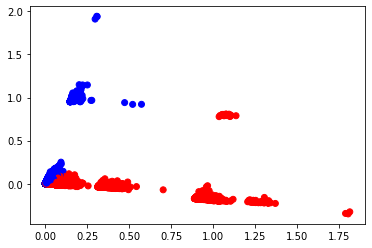

In [0]:
#Visualize the points on the orthogonal plot
#Now add color
colors = {'T1':'r', 'T2':'b'}
plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'], c=df_lsa['Topic'].apply(lambda x: colors[x]))

In [0]:
pd.crosstab(df_lsa.Topic, df_lsa.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Topic,,,,,,,,,,,,,,,
T1,461,527,508,478,565,596,581,596,607,633,630,527,537,413,349
T2,647,822,825,770,814,810,823,759,811,995,1035,913,903,582,483


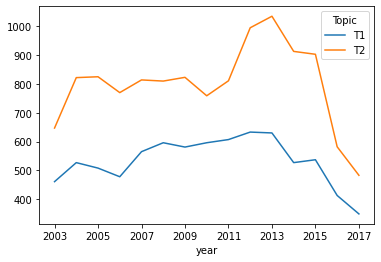

In [0]:
pd.crosstab(df_lsa.year,df_lsa.Topic).plot()

In [0]:
#Transform the data with TfIdf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.headline_text.values)
word_features = vectorizer.get_feature_names()
#print(len(word_features))
#print(word_features[5000:5100])

In [0]:
#Topic modeling with SVD
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = pd.DataFrame(lsa.fit_transform(X.asfptype()), columns = ['C1', 'C2'])

In [0]:
dtm_lsa.head()

,C1,C2
0,0.014803,-0.009907
1,0.001066,-0.000866
2,0.025413,-0.020857
3,0.008696,0.007607
4,0.009824,-0.004468


In [0]:
df_lsa = data
df_lsa['Bow']=X
df_lsa['C1'] = dtm_lsa['C1']
df_lsa['C2'] = dtm_lsa['C2']
df_lsa['Topic'] = np.where(dtm_lsa['C1']>dtm_lsa['C2'], 'T1', 'T2')
df_lsa.head()

,Unnamed: 0,publish_date,headline_text,year,Bow,C1,C2,Topic
0,355023,20080106,kibaki offers unified kenyan govt,2008,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.014803,-0.009907,T1
1,508861,20091223,gp deregistered over depression prescriptions,2009,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.001066,-0.000866,T1
2,374650,20080404,opposition wants more protection for indigenous,2008,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.025413,-0.020857,T1
3,958559,20150608,queens birthday honours recognise country,2015,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.008696,0.007607,T1
4,549951,20100712,smith wont commit to second term ets,2010,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.009824,-0.004468,T1


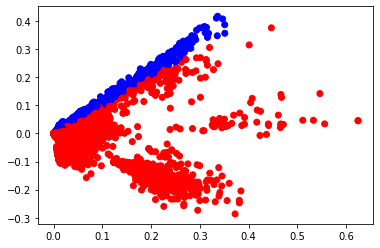

In [0]:
#Visualize the points on the orthogonal plot
# With color
colors = {'T1':'r', 'T2':'b'}
plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'], c=df_lsa['Topic'].apply(lambda x: colors[x]))

In [0]:
pd.crosstab(df_lsa.Topic, df_lsa.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Topic,,,,,,,,,,,,,,,
T1,1075,1306,1296,1205,1315,1353,1357,1288,1337,1529,1570,1358,1386,959,801
T2,33,43,37,43,64,53,47,67,81,99,95,82,54,36,31


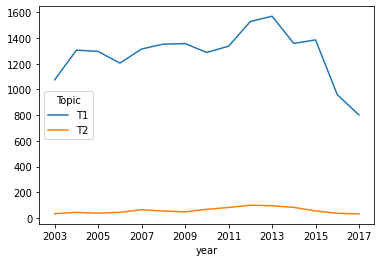

In [0]:
pd.crosstab(df_lsa.year,df_lsa.Topic).plot()

In [0]:
#Get the data
X = df_lsa[['C1', 'C2']]
#Build the clusters
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
predictions = model.predict(X)

In [0]:
df_lsa['Segment']=predictions

In [0]:
df_lsa.head()

,Unnamed: 0,publish_date,headline_text,year,Bow,C1,C2,Topic,Segment
0,355023,20080106,kibaki offers unified kenyan govt,2008,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.014803,-0.009907,T1,5
1,508861,20091223,gp deregistered over depression prescriptions,2009,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.001066,-0.000866,T1,5
2,374650,20080404,opposition wants more protection for indigenous,2008,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.025413,-0.020857,T1,5
3,958559,20150608,queens birthday honours recognise country,2015,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.008696,0.007607,T1,5
4,549951,20100712,smith wont commit to second term ets,2010,"(0, 6876)\t0.27319567833972697\n (0, 8631)\...",0.009824,-0.004468,T1,5


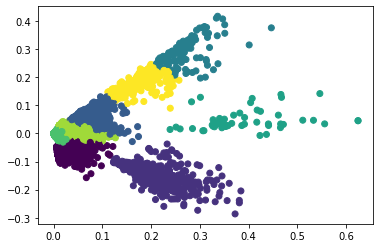

In [0]:
#Plot the components with segment colors
plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'],c=df_lsa['Segment'])

In [1]:
!jupyter nbconvert MODULE4_DAY4_TopicModeling_Project.ipynb

[NbConvertApp] Converting notebook MODULE4_DAY4_TopicModeling_Project.ipynb to html
[NbConvertApp] Writing 443137 bytes to MODULE4_DAY4_TopicModeling_Project.html
